# 决策树分类模型

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#设置字体黑体，汉文正常显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#导入鸢尾花数据函数，决策树模型
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 基本参数设定
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
# 加载数据
iris = load_iris()

(0.0, 7.88, -0.9, 3.4800000000000044)

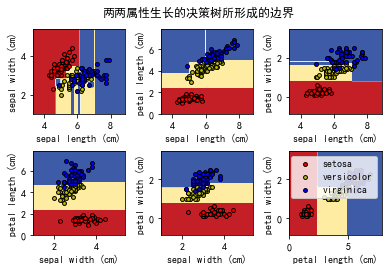

In [2]:

#绘制决策树边界
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # 每次只选取两种属性
    X = iris.data[:, pair]
    y = iris.target
    # 训练
    clf = DecisionTreeClassifier().fit(X, y)
    # 绘制决策树边界
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #生成网格数据
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    # 绘制原始数据点（按照数据真实分类）
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
# 添加大标题用suptitle       
plt.suptitle("两两属性生长的决策树所形成的边界")
plt.legend(loc='best')
plt.axis('tight')


[Text(170.9,205.737,'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(144.608,168.33,'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(197.192,168.33,'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(105.169,130.923,'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(52.5846,93.5167,'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(26.2923,56.11,'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(78.8769,56.11,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(157.754,93.5167,'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(131.462,56.11,'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(184.046,56.11,'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(157.754,18.7033,'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(210.338,18.7033,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(289.215,130.923,'X[2] <= 4.85\ne

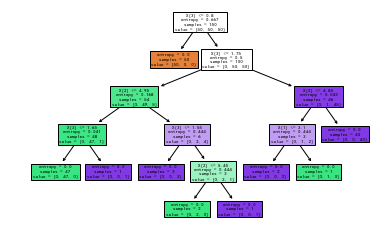

In [3]:
plt.figure()
#用所有数据所生成的决策树模型
clf = DecisionTreeClassifier().fit(iris.data,iris.target)
plot_tree(clf,filled=True)

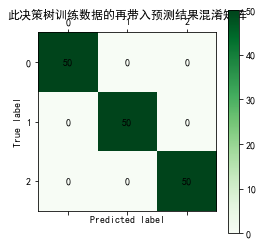

In [4]:
from cm_plot import cm_plot
cm_plot(iris.target,clf.predict(iris.data))
plt.title('此决策树训练数据的再带入预测结果混淆矩阵')
plt.show()

np.meshgrid,  np.array.ravel,  plt.contourf

# 回归树模型：不同树深度的预测结果

决策树回归：
这里是一个一维数据的决策树回归，决策树试图拟合带有噪声点的正弦曲线。

因此，它通过局部回归来近似这条正弦曲线。

我们可以看到，树的最大深度越大，决策树越可以拟合（学习）数据的细节信息，

也即容易产生过拟合。

In [1]:
# 导入所需要的模块及包
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [2]:
#生成随机数据
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1),axis=1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


In [3]:
# 创建深度分别为2与5的两个回归树
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [4]:
#模型训练
X_test = np.arange(0,5,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

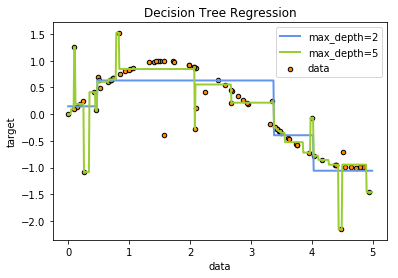

In [6]:
#绘制图形
plt.scatter(X,y,s=20,edgecolor='black',c='darkorange',label='data')
plt.plot(X_test,y_1,color='cornflowerblue',label='max_depth=2',linewidth=2)
plt.plot(X_test,y_2,color='yellowgreen',label='max_depth=5',linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()